In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Most Streamed Spotify 2023.csv", encoding='latin-1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


# Overview of Dataset

In [3]:
# How many rows and columns does the dataset contain?

rows, columns = df.shape # Provide the number of rows and columns of the DataFrame
print("The dataset contains", rows, "rows and", columns, "columns.")

The dataset contains 953 rows and 24 columns.


In [4]:
# What are the data types of each column? Are there any missing values?

print("Data types of each column:")
print(df.dtypes) # Describe each column’s data type.

missing_values = df.isnull().sum() # Count the number of missing values on the dataset.
print("\nMissing values in each column:")
print(missing_values)

Data types of each column:
track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

Missing values in each column:
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists 

# Basic Descriptive Statistics

In [5]:
# What are the mean, median, and standard deviation of the streams column?

# Convert the 'streams' column to numeric values, coercing any errors to NaN
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df = df.dropna(subset=['streams'])

# Show the summary statistics for each column
df.describe()
statsum = df['streams'].describe() # Shows the statistics of the 'streams' column
print("Summary of Streams: ")
print(statsum)

Summary of Streams: 
count    9.520000e+02
mean     5.141374e+08
std      5.668569e+08
min      2.762000e+03
25%      1.416362e+08
50%      2.905309e+08
75%      6.738690e+08
max      3.703895e+09
Name: streams, dtype: float64


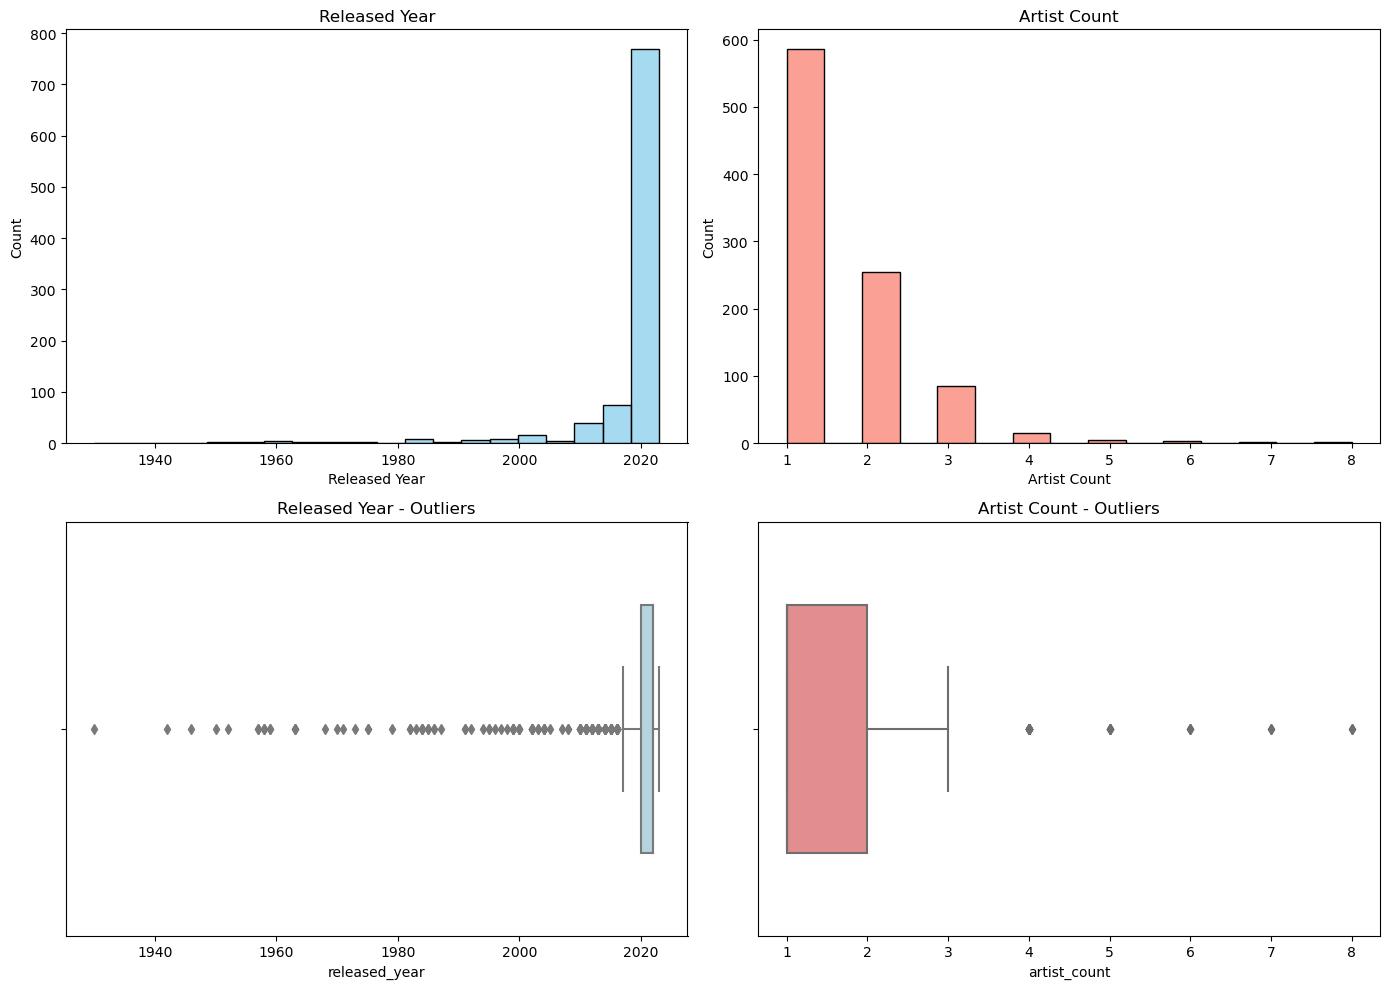

In [6]:
# What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram for 'released_year'
sns.histplot(df['released_year'], bins=20, stat='count', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Released Year')
axes[0, 0].set_xlabel('Released Year')

# Box plot for 'released_year'
sns.boxplot(x=df['released_year'], ax=axes[1, 0], color='lightblue', width=0.6)
axes[1, 0].set_title('Released Year - Outliers')

# Histogram for 'artist_count'
sns.histplot(df['artist_count'], bins=15, stat='count', ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Artist Count')
axes[0, 1].set_xlabel('Artist Count')

# Box plot for 'artist_count'
sns.boxplot(x=df['artist_count'], ax=axes[1, 1], color='lightcoral', width=0.6)
axes[1, 1].set_title('Artist Count - Outliers')

plt.tight_layout()
plt.show()

# Top Performers

In [7]:
# Which track has the highest number of streams? Display the top 5 most streamed tracks.

df.sort_values(by=["streams"],ascending=False).head() # Sorts by 'streams' in descending order and display the top 5 rows.

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,D,Major,76,91,50,54,0,7,5


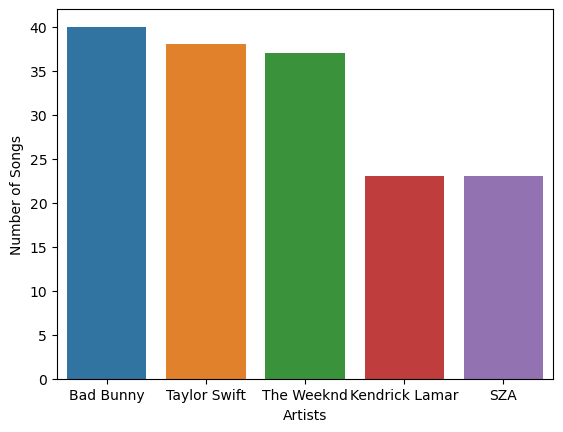

In [8]:
# Who are the top 5 most frequent artists based on the number of tracks in the dataset?

artists = df['artist(s)_name']
artist = []

# Separate multiple artists by commas, stripping extra spaces.
for i in artists:
    for ix in i.split(','):
        artist.append(ix.strip()) 

# Determines the top 5 frequent artists.
freq_art = pd.DataFrame(artist, columns=['Artists']).value_counts().reset_index(name='Number of Songs').iloc[:5]

sns.barplot(x='Artists', y='Number of Songs', data=freq_art)
plt.show()

# Temporal Trends

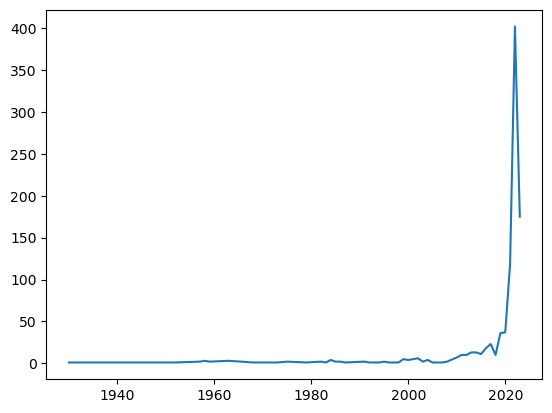

In [9]:
# Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.

spotify_yr = df.groupby('released_year').size() # Count the songs per release year.

plt.plot(spotify_yr) # Plot the number of songs released each year as a line plot.

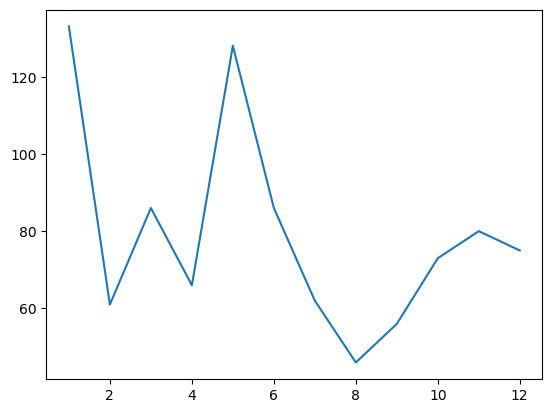

In [10]:
# Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

month_pattern = df.groupby('released_month').size() # Group the data by 'released_month' column and count the number of occurences for each month.

plt.plot(month_pattern) # Plot the pattern of the data.

# Genre and Music Characteristics

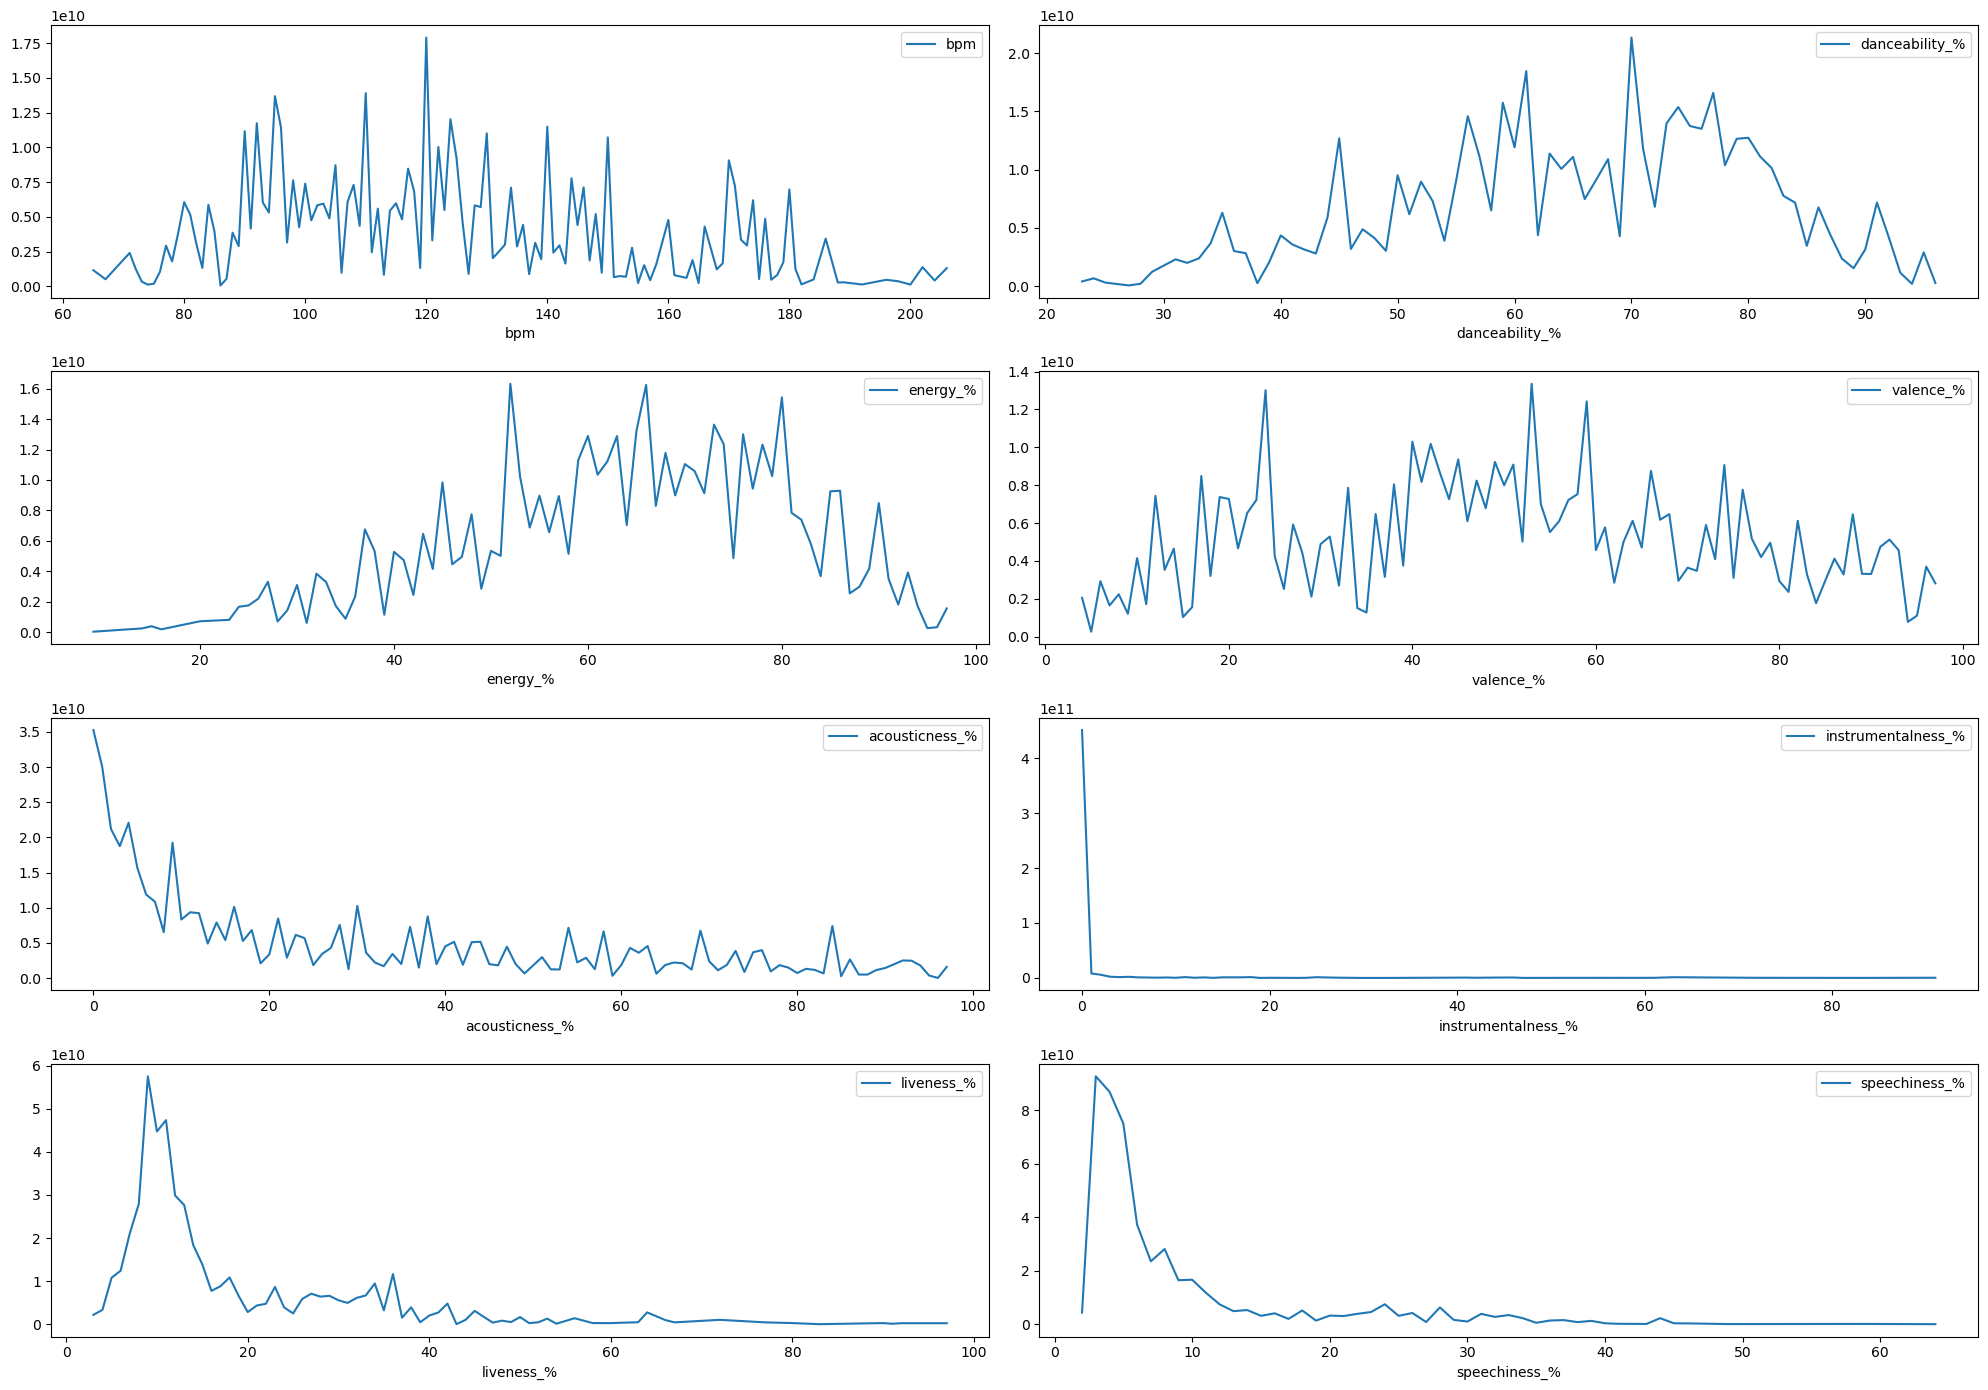

In [11]:
# Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?

features = ['bpm', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(4, 2, figsize=(20, 14)) # Create subplots for each feature
axes = axes.flatten()

for i, feature in enumerate(features): # Plot streams for each feature
    df.groupby(feature)['streams'].sum().sort_index().plot(ax=axes[i], label=feature)
    axes[i].legend()

plt.tight_layout()
plt.show()

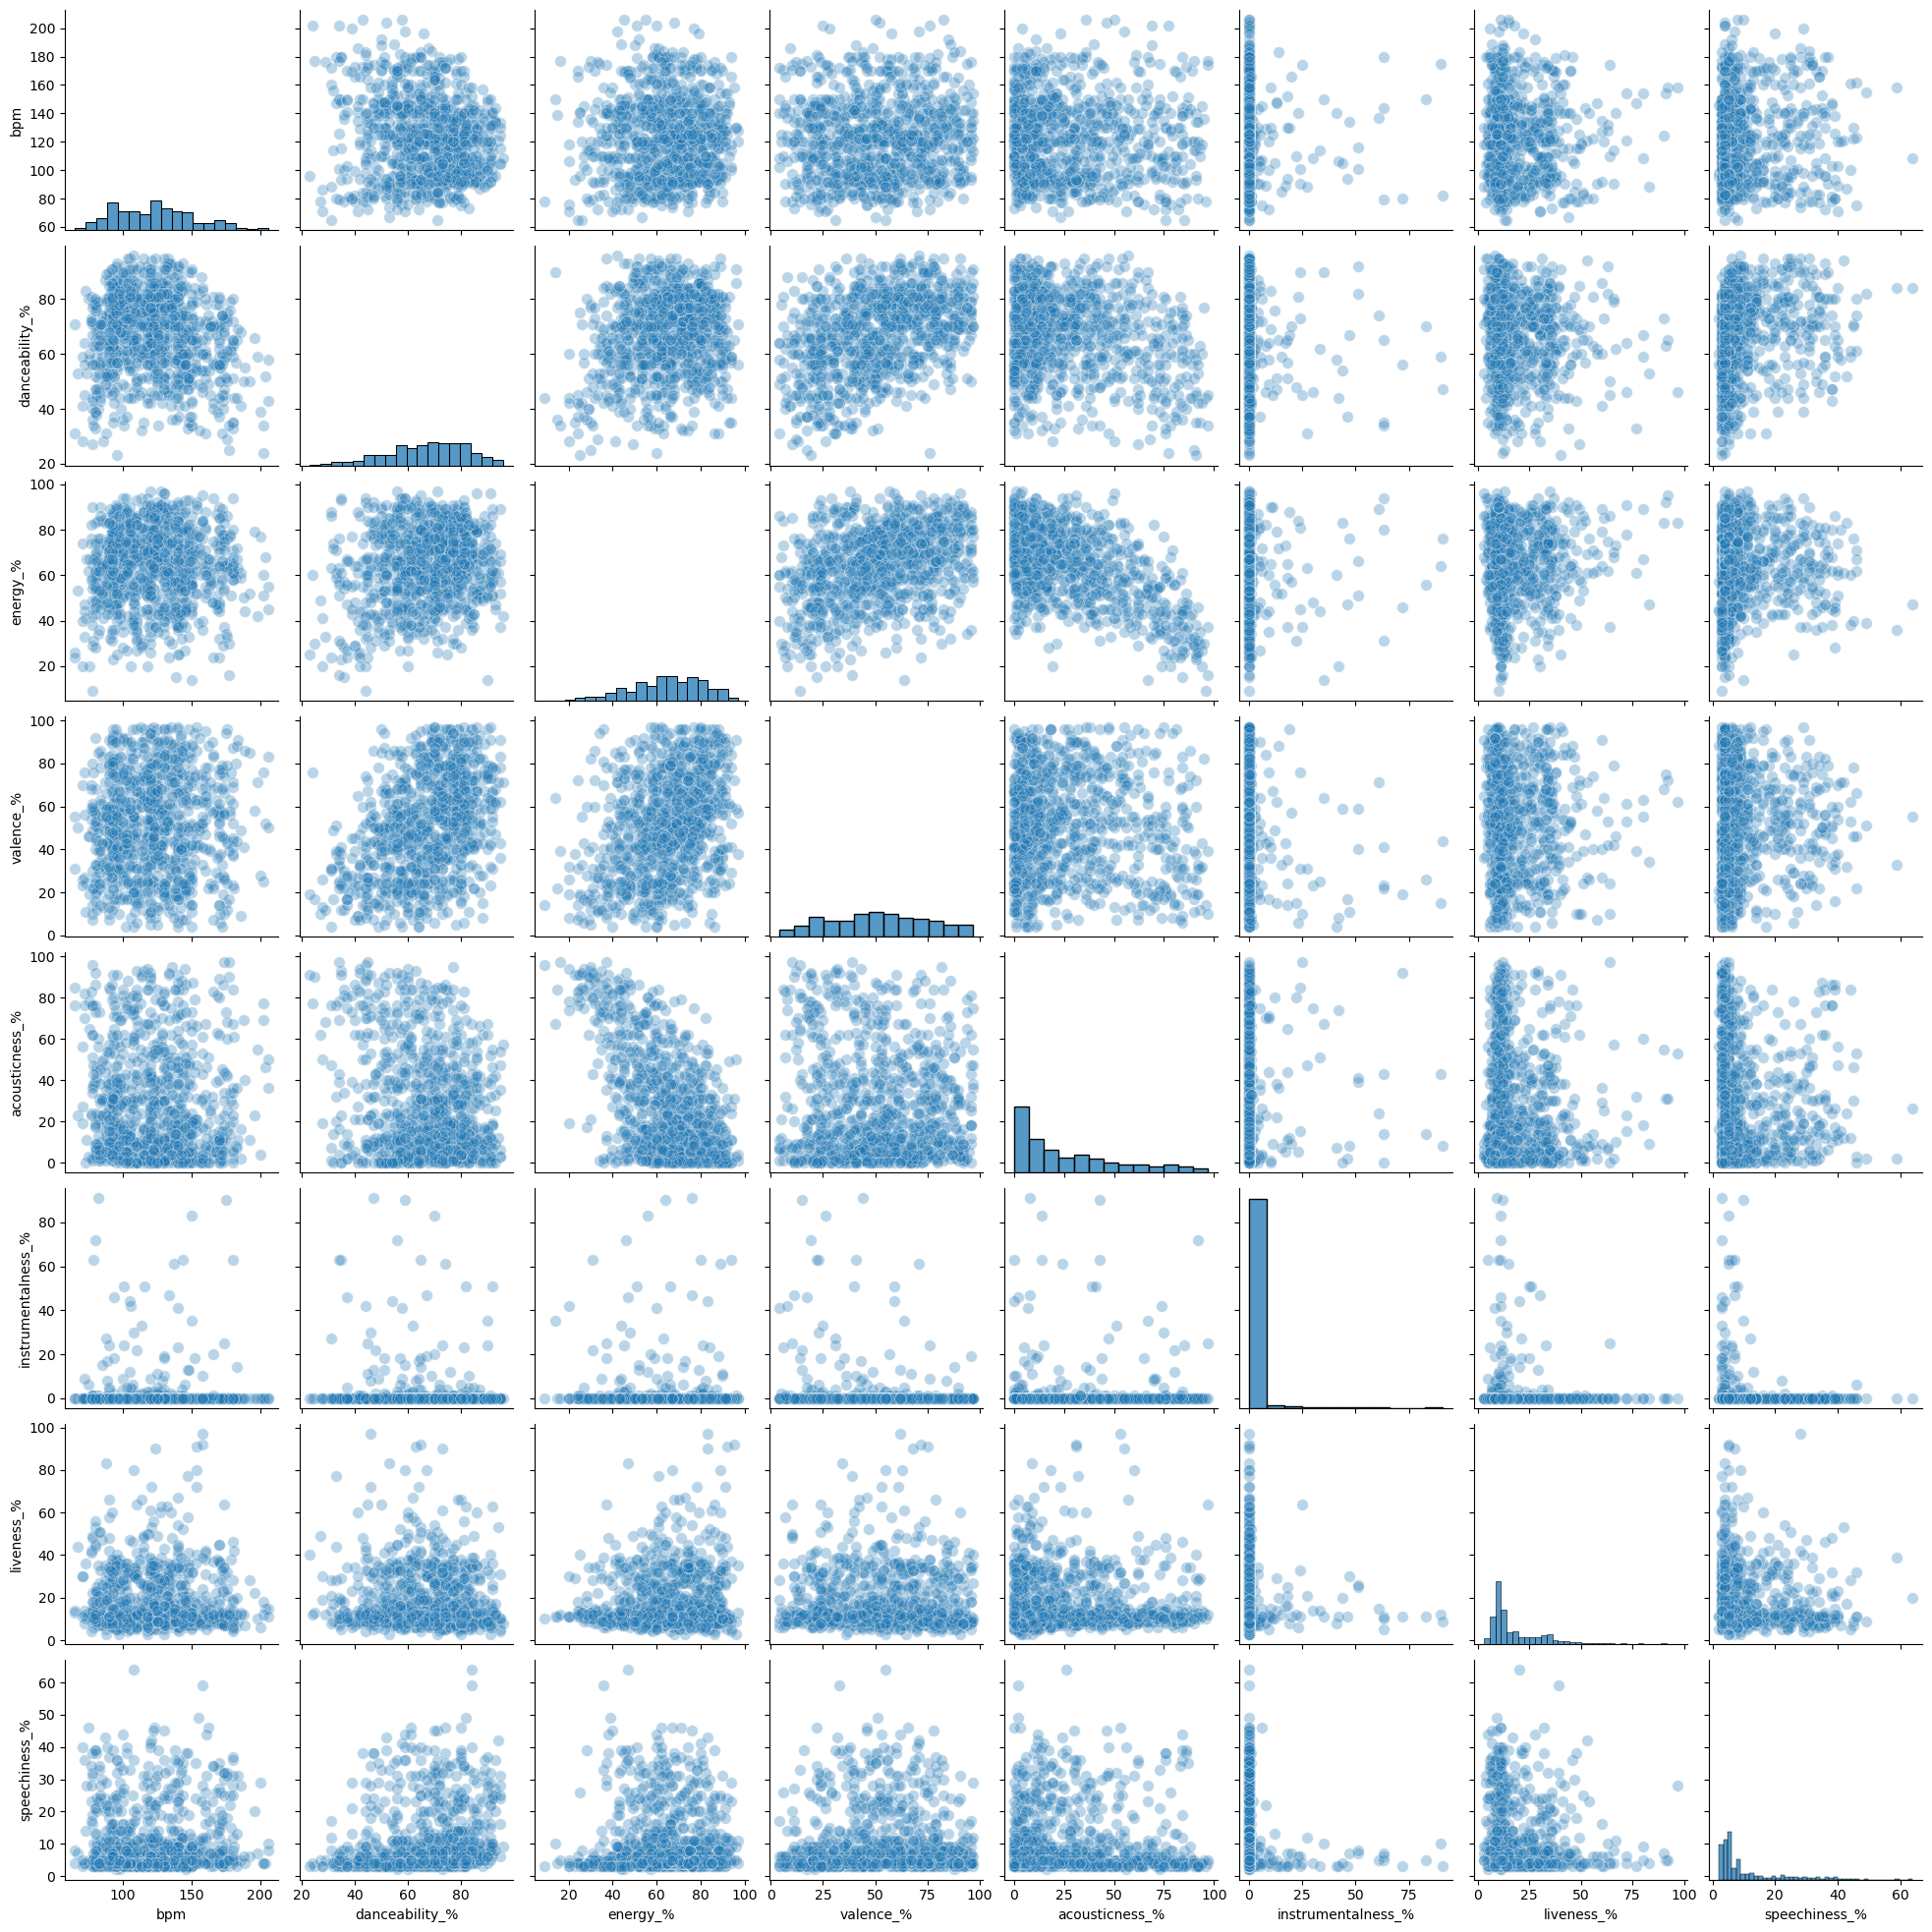

In [12]:
# Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?

musical_attr = df[features]

# Customize the pairplot
sns.pairplot(
    musical_attr,
    plot_kws={
        'alpha': 0.3,        
        's': 70,
        'marker': 'o'
    }
)

# Platform Popularity

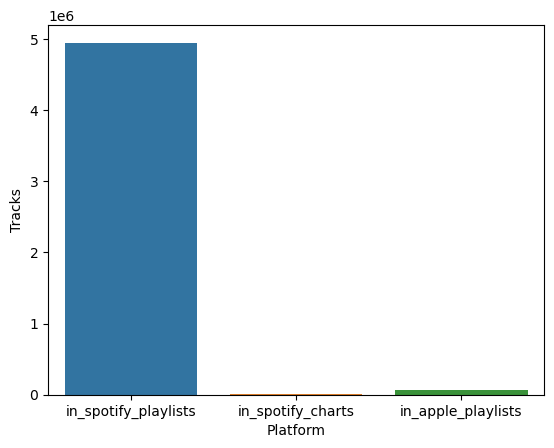

In [13]:
# How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare? 
# Which platform seems to favor the most popular tracks?

sources = ['in_spotify_playlists','in_spotify_charts', 'in_apple_playlists']

track_sums = [df[src].sum() for src in sources] # Sum the tracks for each source

data = pd.DataFrame({'Platform': sources, 'Tracks': track_sums})

sns.barplot(x='Platform', y='Tracks', data=data); # Plot the results

# Advanced Analysis

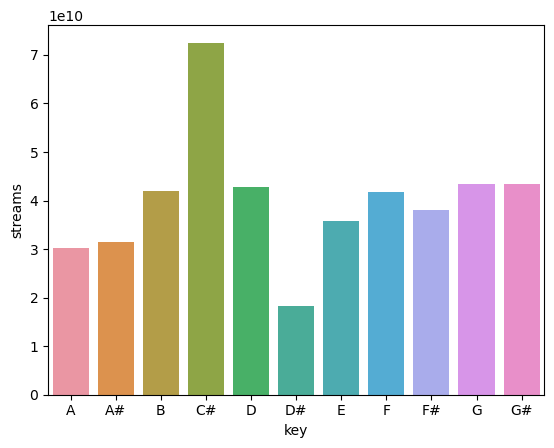

In [14]:
# Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?

# Get the sum of all streams per key
strkey = df.groupby('key')['streams'].sum()

strms_df = strkey.reset_index()
strkey.columns = ['key', 'streams']

sns.barplot(x='key', y='streams', data=strms_df);

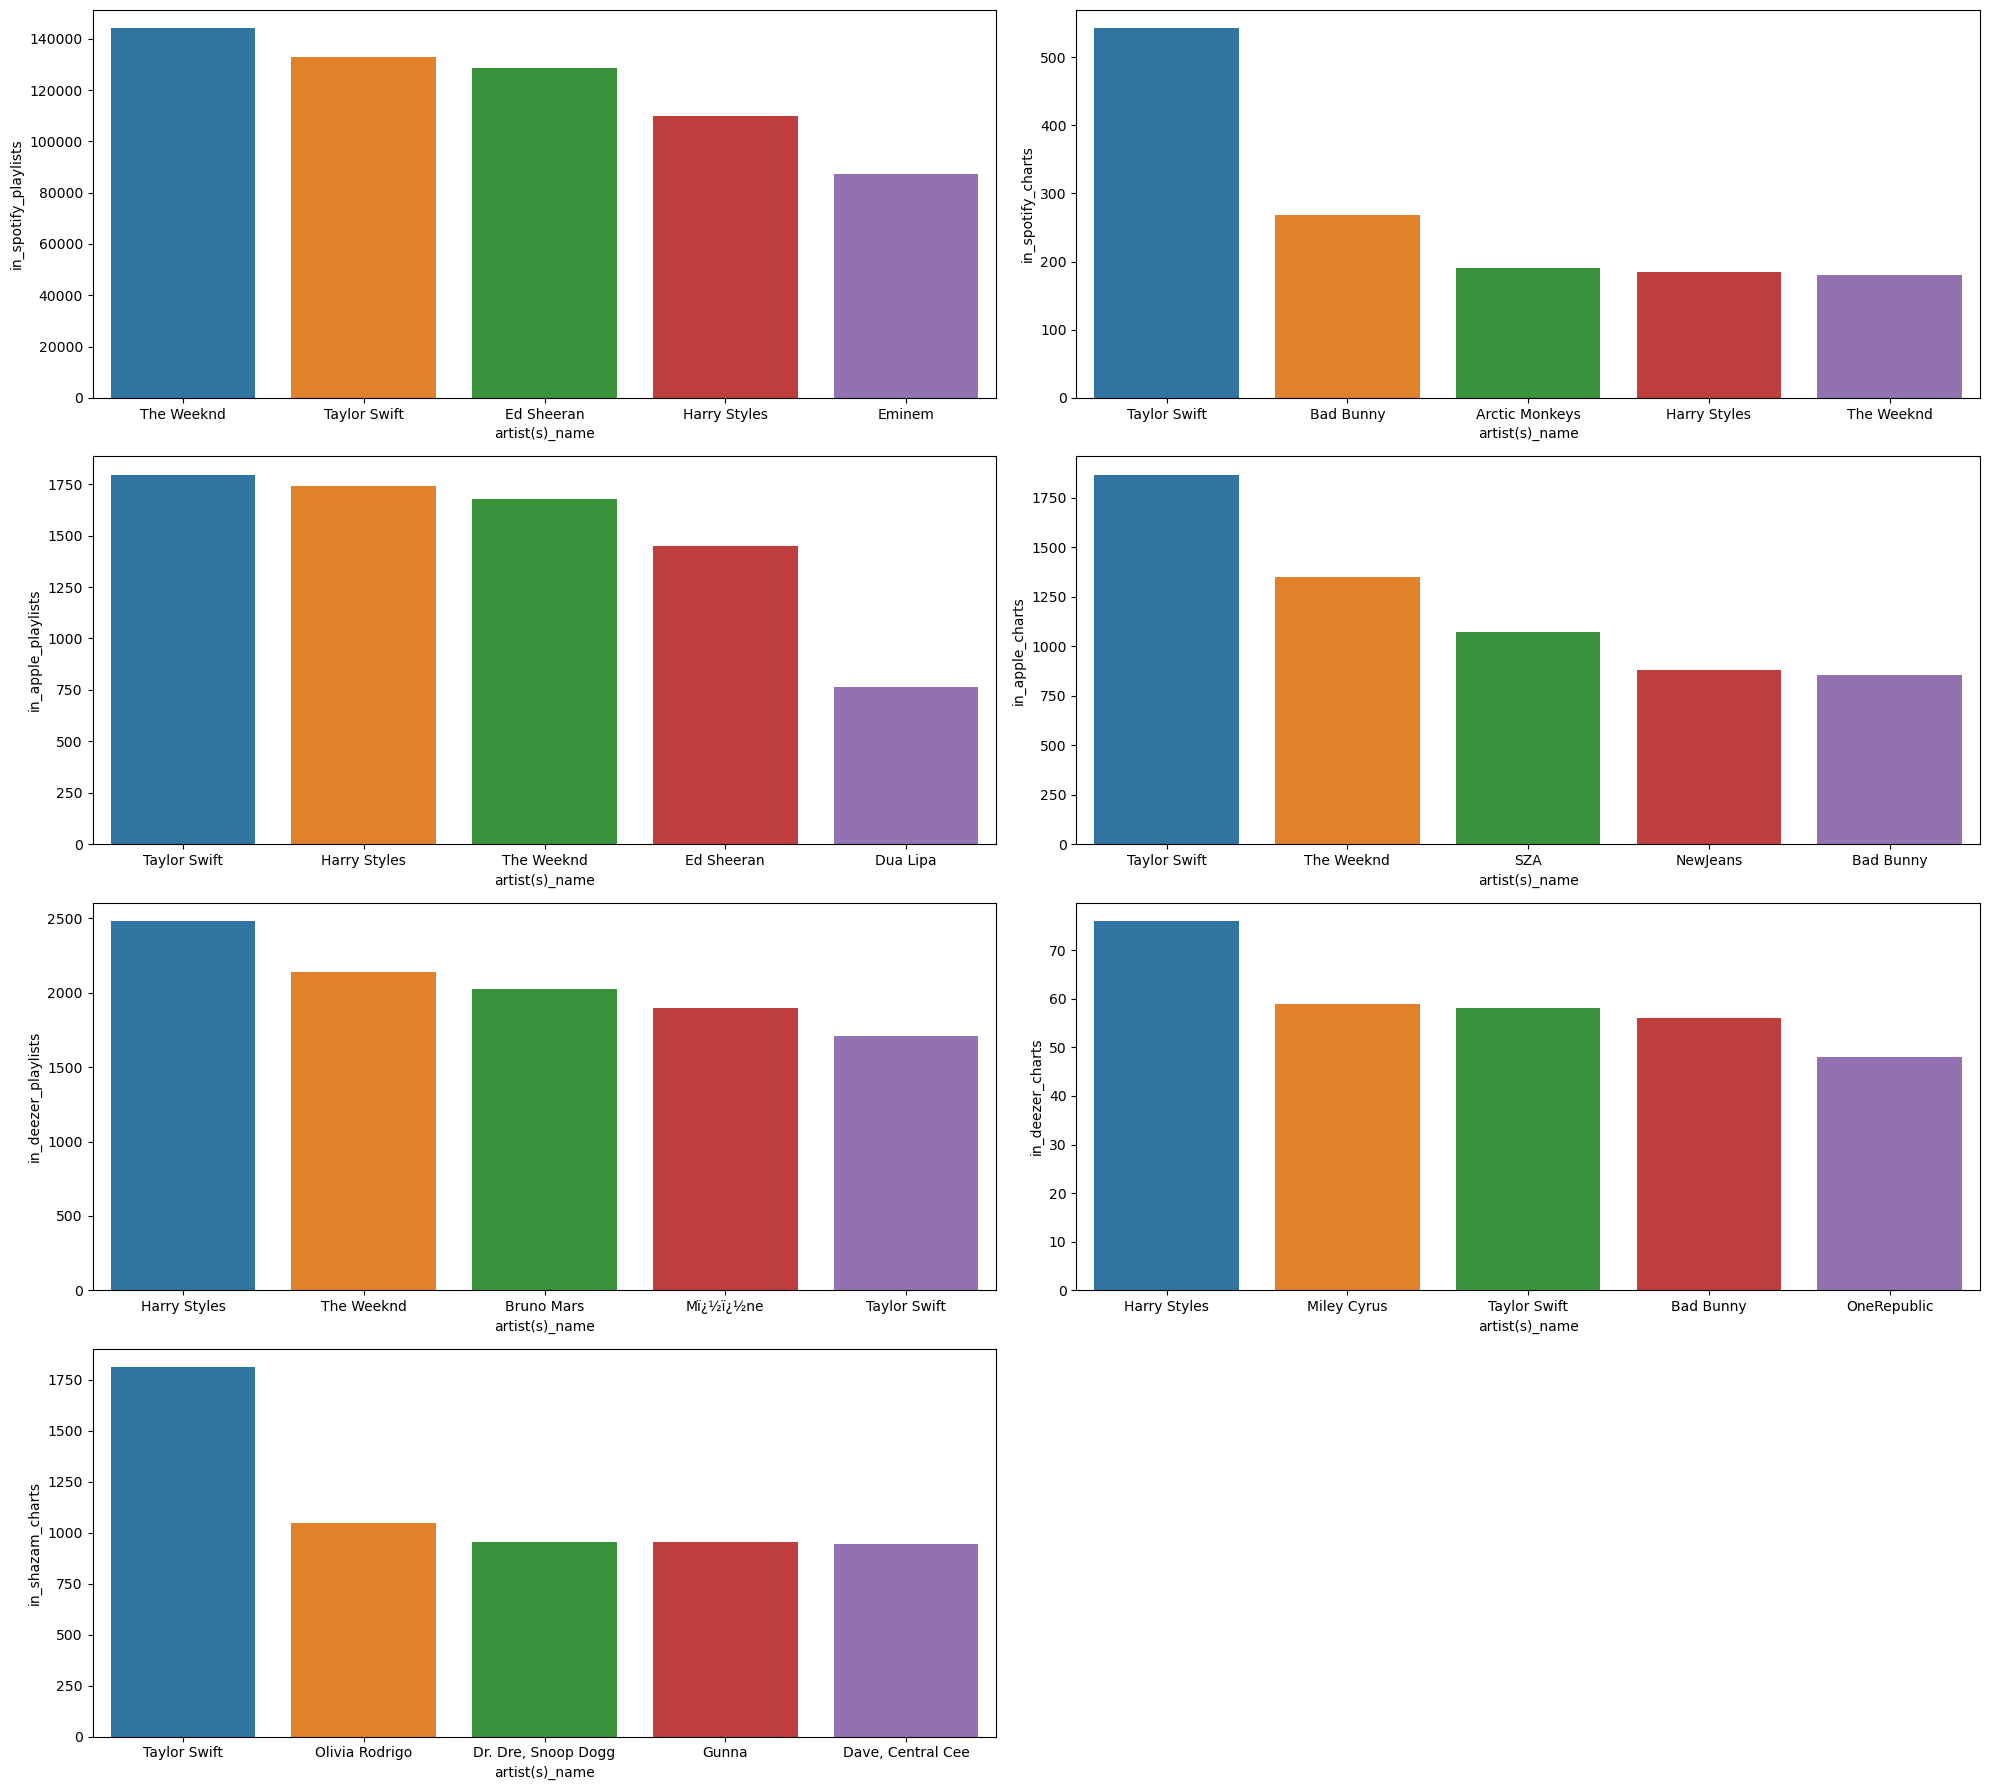

In [16]:
# Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.

filtered_df = df.copy()  # Make a copy of the original DataFrame

platforms = [
    'in_spotify_playlists', 
    'in_spotify_charts', 
    'in_apple_playlists', 
    'in_apple_charts', 
    'in_deezer_playlists',
    'in_deezer_charts',
    'in_shazam_charts'
]

# Create subplots for each platform
fig, axes = plt.subplots(4, 2, figsize=(20, 18)) 
axes = axes.flatten()

for i, platform in enumerate(platforms):
    # Ensure the column is numeric and handle missing values
    filtered_df[platform] = pd.to_numeric(filtered_df[platform], errors='coerce').fillna(0)

    # Group, sum, and sort values.
    artists = filtered_df.groupby('artist(s)_name')[platform].sum().sort_values(ascending=False).reset_index()
    
    sns.barplot(x='artist(s)_name', y=platform, data=artists.head(), ax=axes[i])

for j in range(len(platforms), len(axes)):
    axes[j].axis('off')

plt.tight_layout()  
plt.show()  